<a href="https://colab.research.google.com/github/AnshRajkumar/SHADOW-FOX/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/tmp/ipython-input-1-4193752050.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


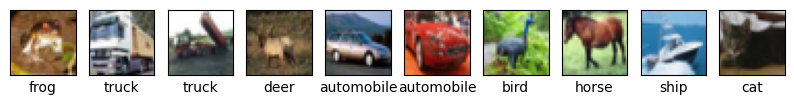

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3530 - loss: 1.7470 - val_accuracy: 0.5524 - val_loss: 1.2425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 41ms/step - accuracy: 0.5790 - loss: 1.1880 - val_accuracy: 0.5954 - val_loss: 1.1514
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6446 - loss: 1.0087 - val_accuracy: 0.6509 - val_loss: 1.0055
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6817 - loss: 0.9092 - val_accuracy: 0.6766 - val_loss: 0.9245
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7156 - loss: 0.8129 - val_accuracy: 0.6934 - val_loss: 0.8848
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7412 - loss: 0.7469 - val_accuracy: 0.6898 - val_loss: 0.9235
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7494 - loss: 0.7114 - val_accuracy: 0.6984 - val_loss: 0.8748
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7699 -

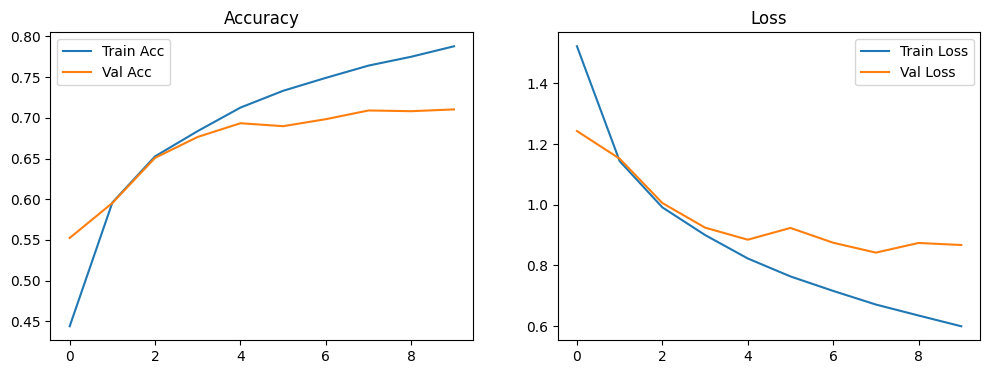

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


/tmp/ipython-input-1-4193752050.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} | Actual: {class_names[int(y_test[index])]}")


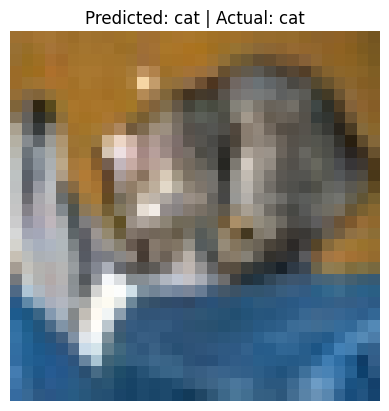

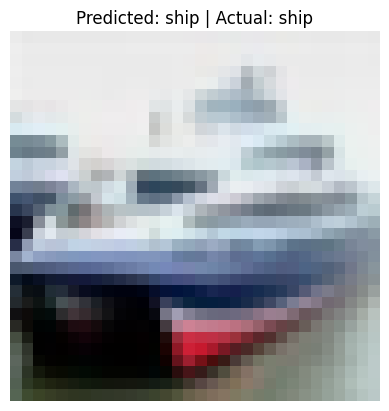

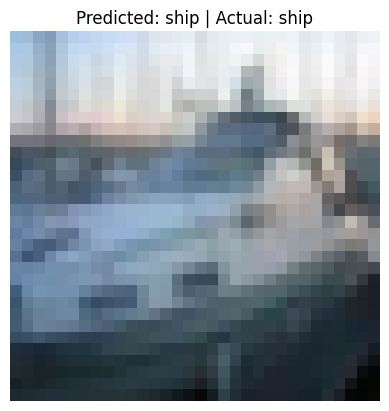

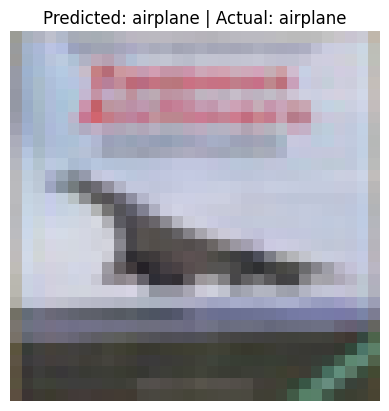

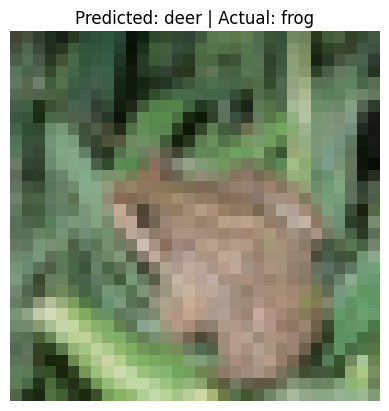

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

def display_prediction(index):
    plt.figure()
    plt.imshow(x_test[index])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} | Actual: {class_names[int(y_test[index])]}")
    plt.axis('off')
    plt.show()


for i in range(5):
    display_prediction(i)